## **Activity 1: Warmup**

**Import thư viện**

In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

**Vẽ đồ thị hàm Sigmoid trong khoảng [-10, 10]**

Text(0, 0.5, 'Sigmoid function')

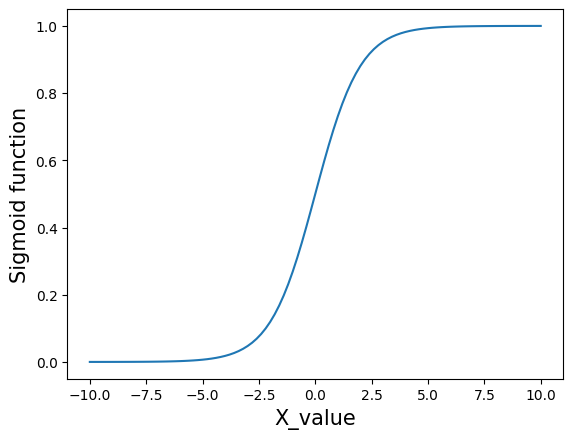

In [93]:
g = lambda z: 1/(1+np.exp(-z))
t = lambda z: (np.exp(2*z)-1)/(np.exp(2*z)+1)
x = np.linspace(-10,10,101)
y = g(x)
z = t(x)
plt.plot(x,y)
plt.xlabel("X_value",fontsize = 15)
plt.ylabel("Sigmoid function",fontsize = 15)

**Vẽ đồ thị hàm Tanh trong khoảng [-10, 10]**

Text(0, 0.5, 'Tanh function')

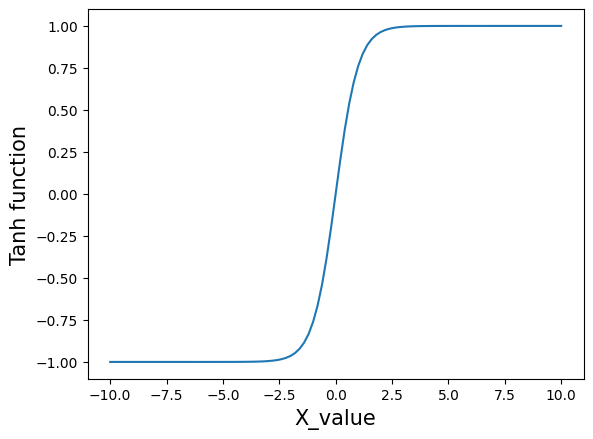

In [94]:
plt.plot(x,z)
plt.xlabel("X_value",fontsize = 15)
plt.ylabel("Tanh function",fontsize = 15)

## **Activity 2: Hoạt động của mạng nơron**

**Biểu diễn toán tử AND**

In [95]:
X = np.array([[1,0,0],[1,1,0],[1,0,1],[1,1,1]])
w_and = np.array([[-30,20,20]])
z = np.dot(X,w_and.T)
y_and = g(z)
print(y_and)

[[9.35762297e-14]
 [4.53978687e-05]
 [4.53978687e-05]
 [9.99954602e-01]]


**Biểu diễn toán tử OR**

In [96]:
X = np.array([[1,0,0],[1,1,0],[1,0,1],[1,1,1]])
w_or = np.array([[-10,20,20]])
z = np.dot(X,w_or.T)
y_or = g(z)
print(y_or)

[[4.53978687e-05]
 [9.99954602e-01]
 [9.99954602e-01]
 [1.00000000e+00]]


**Biểu diễn toán tử XNOR**

In [97]:
X = np.array([[1,0,0],[1,1,0],[1,0,1],[1,1,1]])
w_or = np.array([[10,-20,-20]])
z = np.dot(X,w_or.T)
y_or = g(z)

In [98]:
xl2 = np.hstack((np.ones((y_and.shape[0],1)),y_and,y_or))
w_xnor = np.array([[10,-20,-20]])
print(g(np.dot(xl2,w_xnor.T)))

[[4.54391049e-05]
 [9.99954520e-01]
 [9.99954520e-01]
 [4.54391049e-05]]


## **Activity 3: Load data and preprocessing**

**Tạo DataFrame của pandas từ file “Social_Network_Ads.csv”**

In [99]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


**Trích xuất input là cột “Age" và cột “EstimateSalary", output là cột “Purchased"**

In [100]:
x = data.iloc[:,[2,3]].values
y = data.iloc[:,-1:].values

**Chia tập dữ liệu thành train set và test set**

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

**Chuẩn hóa input sao cho các giá trị của mỗi feature nằm trong khoảng [0,1].**

In [102]:
X_max = X_train.max(axis=0, keepdims=True)
X_min = X_train.min(axis=0, keepdims=True)
X_train_scaled = (X_train - X_min)/(X_max - X_min)
X_test_scaled = (X_test - X_min)/(X_max - X_min)

**Thêm cột số 1 bên trái của input( thêm số hạng bias vào input)**

In [103]:
X_train_scaled = np.hstack((np.ones([X_train_scaled.shape[0],1]),X_train_scaled))
X_test_scaled = np.hstack((np.ones([X_test_scaled.shape[0],1]),X_test_scaled))

## **Activity 4: Xây dựng mô hình mạng nơron có 2 hidden layers để biểu diễn xác suất mua hàng của khách hàng**

**Mô hình dự báo**

In [104]:
def predict(X,w1,w2,w3):
  z1 = np.dot(X,w1)
  a1 = g(z1)

  a1 = np.hstack((np.ones((a1.shape[0],1)),a1))

  z2 = np.dot(a1,w2)
  a2 = g(z2)

  a2 = np.hstack((np.ones((a2.shape[0],1)),a2))
  z3 = np.dot(a2,w3)
  #z3 = np.float64(z3)
  return g(z3)

**Hàm loss**

In [105]:
def loss(X,y,w1,w2,w3):
  y_hat = predict(X,w1,w2,w3)
  theta = 1e-3
  l = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -np.mean(l)

**Hàm dự đoán mua/không mua**

In [106]:
def predict_binary(X,w1,w2,w3):
  y_pred = predict(X,w1,w2,w3)
  y_pred[y_pred >=0.5] = 1
  y_pred[y_pred <0.5] = 0
  return y_pred

**Random Search**

In [107]:
NDIMS = 3
L1 = 32
L2 = 8
epochs = 10000
lr = 0.02

w1 = np.random.randn(NDIMS,L1)
w2 = np.random.randn(L1+1,L2)
w3 = np.random.randn(L2+1,1)

y_pred = predict(X_train_scaled,w1,w2,w3)
l0 = loss(X_train_scaled,y_train,w1,w2,w3)
print("Initial loss = ",l0)
for i in range(epochs):
  dw1 = lr*np.random.randn(NDIMS,L1)
  dw2 = lr*np.random.randn(L1+1,L2)
  dw3 = lr*np.random.randn(L2+1,1)
  
  l1 = loss(X_train_scaled, y_train, w1+dw1,w2+dw2,w3+dw3)
  if(l1<l0):
    l0 = l1
    w1+=dw1
    w2+=dw2
    w3+=dw3
print(f"Final loss = {l0}")

Initial loss =  0.7927401334775903
Final loss = 0.22657508842291268


**Tính y dự đoán**

In [108]:
y_pred = predict_binary(X_test_scaled,w1,w2,w3)

**Hàm đánh giá**

In [109]:
def evaluation(y_true, y_pred):
# y_true và y_pred là hai danh sách chứa nhãn thực tế và nhãn dự đoán của các mẫu
# Giả sử nhãn Positive là 1 và nhãn Negative là 0
  tp = tn = fp = fn = 0 # Khởi tạo các biến đếm
  for i in range(len(y_true)): # Duyệt qua từng cặp nhãn
    if y_true[i] == 1 and y_pred[i] == 1: # Nếu cả hai nhãn đều là Positive
      tp += 1 # Tăng biến tp lên 1
    elif y_true[i] == 0 and y_pred[i] == 0: # Nếu cả hai nhãn đều là Negative
      tn += 1 # Tăng biến tn lên 1
    elif y_true[i] == 0 and y_pred[i] == 1: # Nếu nhãn thực tế là Negative nhưng nhãn dự đoán lại là Positive
      fp += 1 # Tăng biến fp lên 1
    elif y_true[i] == 1 and y_pred[i] == 0: # Trường hợp còn lại, tức là nhãn thực tế là Positive nhưng nhãn dự đoán lại là Negative
      fn += 1 # Tăng biến fn lên 1
  print(f"tp = {tp}, tn = {tn}, fp = {fp}, fn = {fn}, ")
  print(f"Accuracy = {(tp+tn)/(tp+tn+fp+fn)}")
  print(f"Precision = {(tp)/(tp+fp)}")
  print(f"Recall = {(tp)/(tp+fn)}")

**Dự đoán khả năng mua hàng của các khách hàng trong tập test, so sánh giá trị dự đoán với giá trị thực tế thông qua các đại lượng ACCURACY, RECALL, PRECISION.**

In [110]:
evaluation(y_test, y_pred)

tp = 27, tn = 48, fp = 4, fn = 1, 
Accuracy = 0.9375
Precision = 0.8709677419354839
Recall = 0.9642857142857143


**Viết lại mô hình neural network ở trên dưới dạng một class có tên là : “MyNeuralNetwork"**

In [111]:
class MyNeuralNetwork:
  def __init__(self,lr = 0.02,epochs=5000):
    self.lr = lr
    self.epochs = epochs
  def g(self,z):
    return 1/(1+np.exp(-z))
  def predict_prob(self,X,w1,w2,w3,w4):
    z1 = np.dot(X,w1)
    a1 = self.g(z1)

    a1 = np.hstack((np.ones((a1.shape[0],1)),a1))

    z2 = np.dot(a1,w2)
    a2 = self.g(z2)

    a2 = np.hstack((np.ones((a2.shape[0],1)),a2))
    z3 = np.dot(a2,w3)

    a3 = self.g(z3)

    a3 = np.hstack((np.ones((a3.shape[0],1)),a3))
    z4 = np.dot(a3,w4)
    z4 = np.float64(z4)
    return g(z4)
  def predict(self,X,w1,w2,w3,w4):
    y_pred = self.predict_prob(X,w1,w2,w3,w4)
    y_pred[y_pred >=0.5] = 1
    y_pred[y_pred <0.5] = 0
    return y_pred
  def loss(self,X,y,w1,w2,w3,w4):
    y_hat = self.predict_prob(X,w1,w2,w3,w4)
    theta = 1e-3
    l = y*np.log(y_hat+theta)+(1-y)*np.log(1-y_hat+theta)
    return -np.mean(l)
  def train(self,X,y,NDIMS,L1,L2,L3):
    w1 = np.random.randn(NDIMS,L1)
    w2 = np.random.randn(L1+1,L2)
    w3 = np.random.randn(L2+1,L3)
    w4 = np.random.randn(L3+1,1)
    y_pred = self.predict_prob(X,w1,w2,w3,w4)
    l0 = self.loss(X,y,w1,w2,w3,w4)
    print("Initial loss = ",l0)
    for i in range(self.epochs): # Thay đổi số lần random search
      dw1 = self.lr*np.random.randn(NDIMS,L1)
      dw2 = self.lr*np.random.randn(L1+1,L2)
      dw3 = self.lr*np.random.randn(L2+1,L3)
      dw4 = self.lr*np.random.randn(L3+1,1)
      
      l1 = self.loss(X,y,w1+dw1,w2+dw2,w3+dw3,w4+dw4)
      if(l1<l0):
        l0 = l1
        w1+=dw1
        w2+=dw2
        w3+=dw3
        w4+=dw4
    print(f"Final loss = {l0}")
    return w1,w2,w3,w4

**Thay đổi số nơrons trong network, thay đổi số lần random search để tìm kiếm mô hình dự đoán tốt nhất cho tập validation ( lấy 10% tập train làm tập validation)**

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state = 42)  # Tách tập train thành tập train và tập validation

In [113]:
X_max = X_train.max(axis=0, keepdims=True)
X_min = X_train.min(axis=0, keepdims=True)
X_train_scaled = (X_train - X_min)/(X_max - X_min)
X_val_scaled = (X_val - X_min)/(X_max - X_min)

In [114]:
X_train_scaled = np.hstack((np.ones([X_train_scaled.shape[0],1]),X_train_scaled))
X_val_scaled = np.hstack((np.ones([X_val_scaled.shape[0],1]),X_val_scaled))

**Huấn luyện qua 3 lớp hidden layers**

In [115]:
model = MyNeuralNetwork()
w1,w2,w3,w4 = model.train(X_train_scaled,y_train,3,32,64,32)

Initial loss =  0.572046410066027
Final loss = 0.21487267653477582


In [116]:
y_pred = model.predict(X_val_scaled,w1,w2,w3,w4)

**Dự đoán khả năng mua hàng của các khách hàng trong tập validation, so sánh giá trị dự đoán với giá trị thực tế thông qua các đại lượng ACCURACY, RECALL, PRECISION.**

In [117]:
evaluation(y_val,y_pred)

tp = 9, tn = 20, fp = 2, fn = 1, 
Accuracy = 0.90625
Precision = 0.8181818181818182
Recall = 0.9


**Sử dụng KFold thực hiện cross-validation**

In [118]:
from sklearn.model_selection import KFold

class MyNeuralNetwork:
    def __init__(self, lr=0.02, epochs=5000, k=5):
        self.lr = lr
        self.epochs = epochs
        self.k = k
        
    def g(self, z):
        return 1/(1+np.exp(-z))
    
    def predict_prob(self, X, w1, w2, w3, w4):
        z1 = np.dot(X, w1)
        a1 = self.g(z1)

        a1 = np.hstack((np.ones((a1.shape[0], 1)), a1))

        z2 = np.dot(a1, w2)
        a2 = self.g(z2)

        a2 = np.hstack((np.ones((a2.shape[0], 1)), a2))
        z3 = np.dot(a2, w3)

        a3 = self.g(z3)

        a3 = np.hstack((np.ones((a3.shape[0], 1)), a3))
        z4 = np.dot(a3, w4)
        z4 = np.float64(z4)
        return self.g(z4)
    
    def predict(self, X, w1, w2, w3, w4):
        y_pred = self.predict_prob(X, w1, w2, w3, w4)
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def loss(self, X, y, w1, w2, w3, w4):
        y_hat = self.predict_prob(X, w1, w2, w3, w4)
        theta = 1e-3
        l = y * np.log(y_hat + theta) + (1 - y) * np.log(1 - y_hat + theta)
        return -np.mean(l)
    
    def train(self, X, y, NDIMS, L1, L2, L3):
        kf = KFold(n_splits=self.k)
        best_loss = float('inf')
        best_w = None
        
        for train_idx, val_idx in kf.split(X):
            X_train, y_train = X[train_idx], y[train_idx]
            X_val, y_val = X[val_idx], y[val_idx]
            
            w1 = np.random.randn(NDIMS, L1)
            w2 = np.random.randn(L1+1, L2)
            w3 = np.random.randn(L2+1, L3)
            w4 = np.random.randn(L3+1, 1)
            y_pred = self.predict_prob(X_train, w1, w2, w3, w4)
            l0 = self.loss(X_train, y_train, w1, w2, w3, w4)

            for i in range(self.epochs):
                dw1 = self.lr * np.random.randn(NDIMS, L1)
                dw2 = self.lr * np.random.randn(L1+1, L2)
                dw3 = self.lr * np.random.randn(L2+1, L3)
                dw4 = self.lr * np.random.randn(L3+1, 1)

                l1 = self.loss(X_train, y_train, w1+dw1, w2+dw2, w3+dw3, w4+dw4)
                if l1 < l0:
                    l0 = l1
                    w1 += dw1
                    w2+=dw2
                    w3+=dw3
                    w4+=dw4
            print(f"Final loss = {l0}")
            return w1,w2,w3,w4

**Dự đoán mô hình đã thực hiện cross-validation**

In [119]:
model = MyNeuralNetwork()
w1,w2,w3,w4 = model.train(X_train_scaled,y_train,3,32,64,32)
y_pred = model.predict(X_val_scaled,w1,w2,w3,w4)
evaluation(y_val,y_pred)

Final loss = 0.2299879648198313
tp = 9, tn = 20, fp = 2, fn = 1, 
Accuracy = 0.90625
Precision = 0.8181818181818182
Recall = 0.9
